In [1]:
import sys

class UnbufferedStream:
    def __init__(self, stream):
        self._stream = stream
    def write(self, data):
        self._stream.write(data)
        self._stream.flush()
    def writelines(self, lines):
        self._stream.writelines(lines)
        self._stream.flush()
    def __getattr__(self, name):
        return getattr(self._stream, name)

sys.stdout = UnbufferedStream(sys.stdout)
sys.stderr = UnbufferedStream(sys.stderr)

In [2]:
from testTools import primality_complexity, graph_complexity
from smooth import sieve_to, is_prime, factorize, is_smooth, log_dickman, psi_approx, legendre_symbol
import time
import json
import random
from collections import Counter
import numpy as np
import array


In [ ]:
# primes = sieve_to(1 << 25)
# deltas = array.array("B")
# prev = 0
# for p in primes:
#     gap = p - prev
#     if gap > 255:
#         raise ValueError(f"prime gap {gap} exceeds 255 (won’t fit in uint8)")
#     deltas.append(gap)
#     prev = p

In [ ]:
# len(primes)

2063689

In [ ]:
# with open("primes_deltas.bin", "wb") as fout:
#     deltas.tofile(fout)

In [3]:
t1 = time.time()
p = is_prime("999983")
t2 = time.time()
print(t2-t1, p)

t1 = time.time()
p = is_prime("999999999989")
t2 = time.time()
print(t2-t1, p)

t1 = time.time()
p = is_prime("9223372036854775783")
t2 = time.time()
print(t2-t1, p)

t1 = time.time()
p = is_prime("170141183460469231731687303715884105727")
t2 = time.time()
print(t2-t1, p)

t1 = time.time()
p = is_prime("115792089237316195423570985008687907853269984665640564039457584007913129639747")
t2 = time.time()
print(t2-t1, p)

t1 = time.time()
p = is_prime("2582249878086908589655919172003011874329705792829223512830659356540647622016841194629645353280137831435903171972747492783")
t2 = time.time()
print(t2-t1, p)

0.00010085105895996094 True
0.00012803077697753906 True
8.606910705566406e-05 True
0.0605158805847168 True
0.5853381156921387 True
3.5253591537475586 True


In [4]:
with open("assets/large_prime_dataset.json", 'r') as f:
    raw = json.load(f)
data =  {int(k): v for k, v in raw.items()}

primes_64_bit = [(2**n - k) for n in range(8, 65) for k in data[n]]
primes_256_bit = [(2**n - k) for n in range(8, 257) for k in data[n]]
primes_400_bit = [(2**n - k) for n in range(8, 401) for k in data[n]]

print(len(primes_64_bit), max(primes_64_bit))
print(len(primes_256_bit), max(primes_256_bit))
print(len(primes_400_bit), max(primes_400_bit))

data_64 = primes_64_bit
data_256 = [primes_256_bit[i] for i in range(0, len(primes_256_bit), 4)]
data_400 = [primes_400_bit[i] for i in range(0, len(primes_400_bit), 5)]
print(len(data_64), len(data_256), len(data_400))

570 18446744073709551557
2490 115792089237316195423570985008687907853269984665640564039457584007913129639747
3930 2582249878086908589655919172003011874329705792829223512830659356540647622016841194629645353280137831435903171972747492783
570 623 786


In [5]:
times_64 = primality_complexity(lambda n : is_prime(n), 0, data_64)
times_400 = primality_complexity(lambda n : is_prime(n), 0, data_400)

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

Finished concat.
Graphing...
197 18446744073709551557 2.220446049250313e-16 0.00010681152343772204


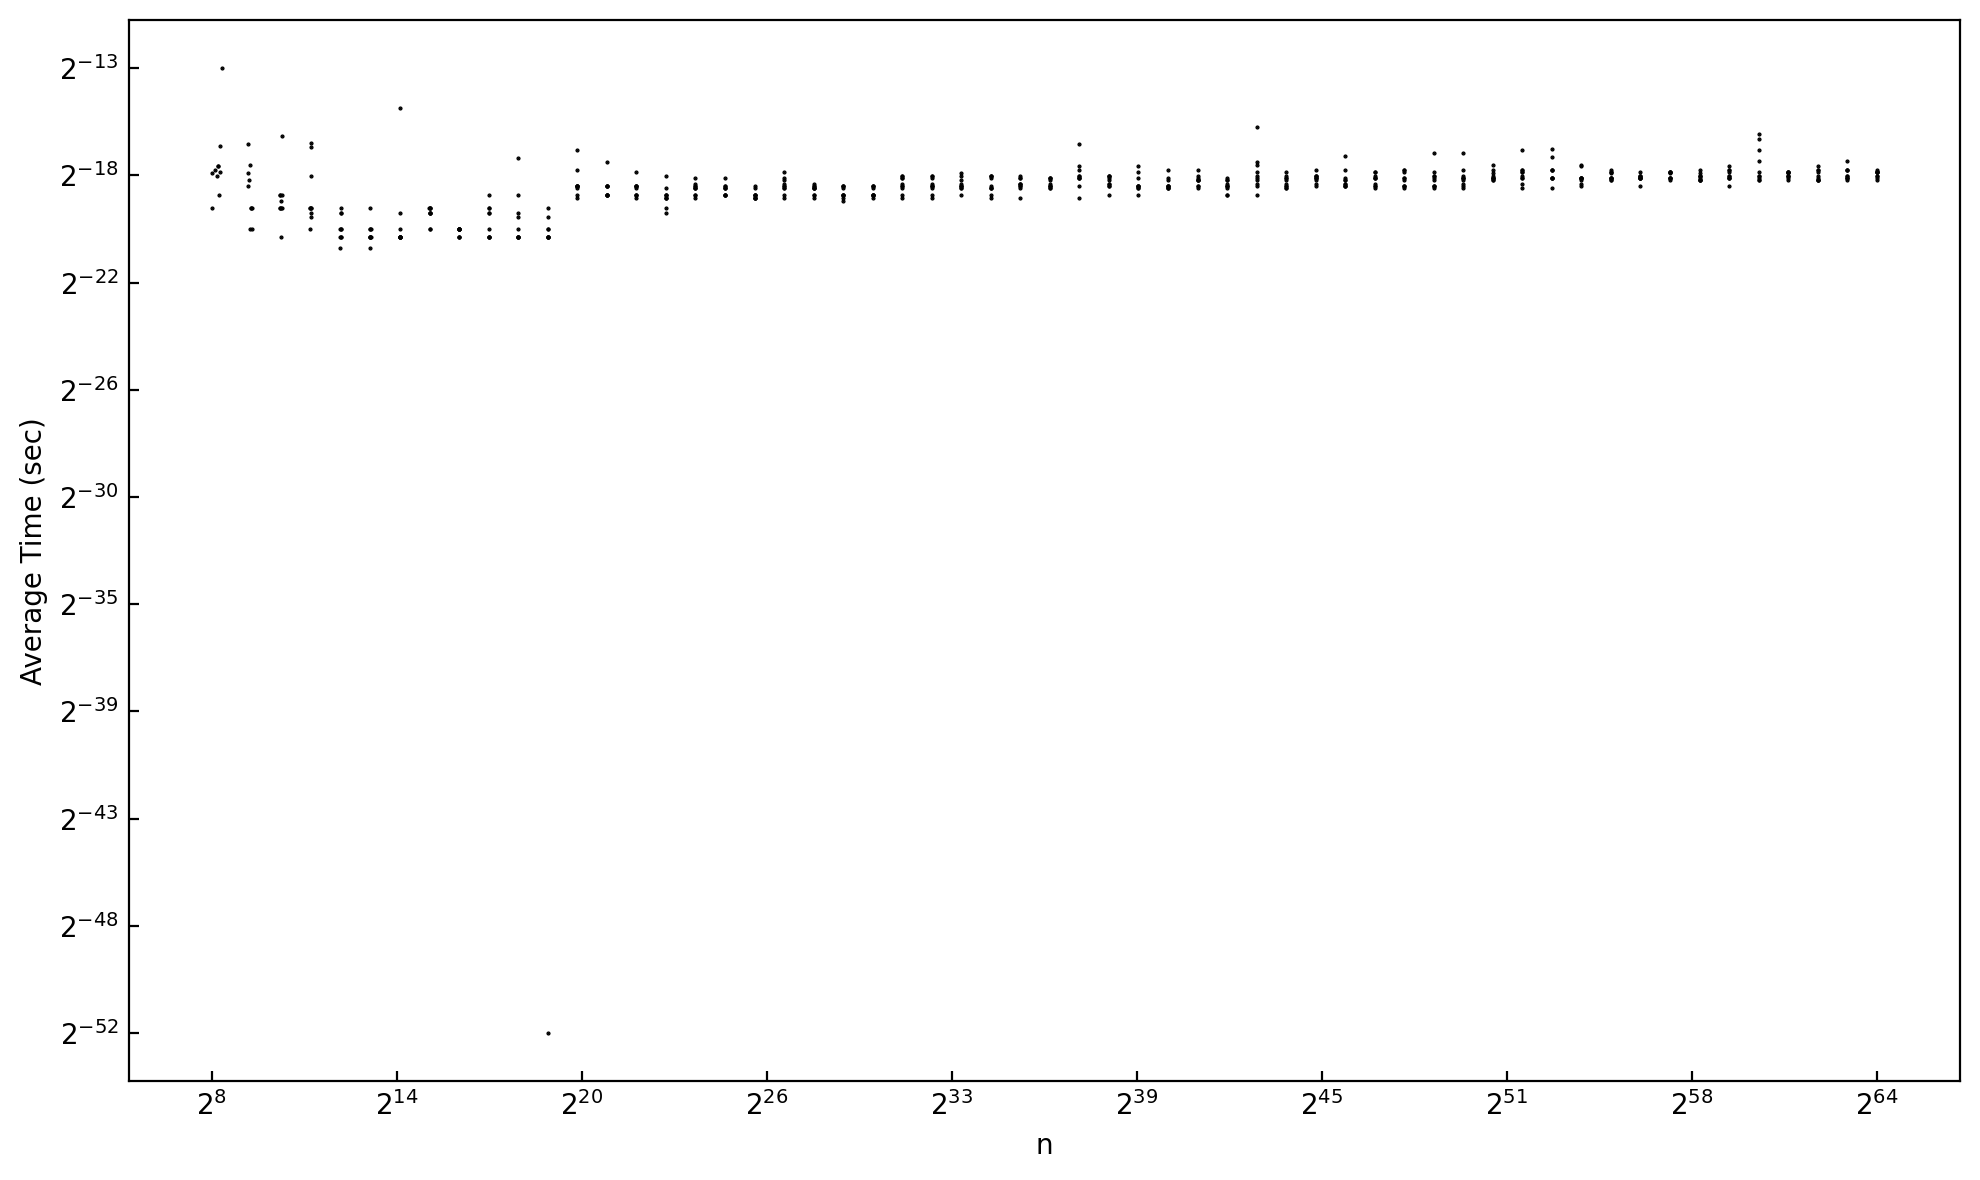

In [6]:
graph_complexity([(t+sys.float_info.epsilon) for t in times_64[0]], times_64[1], dpts=560, log=True)

Finished concat.
Graphing...
227 2582249878086908589655919172003011874329705792829223512830659356540647622016841194629645353280137831435903171972747492783 7.152557375267321e-07 3.6867451667785645


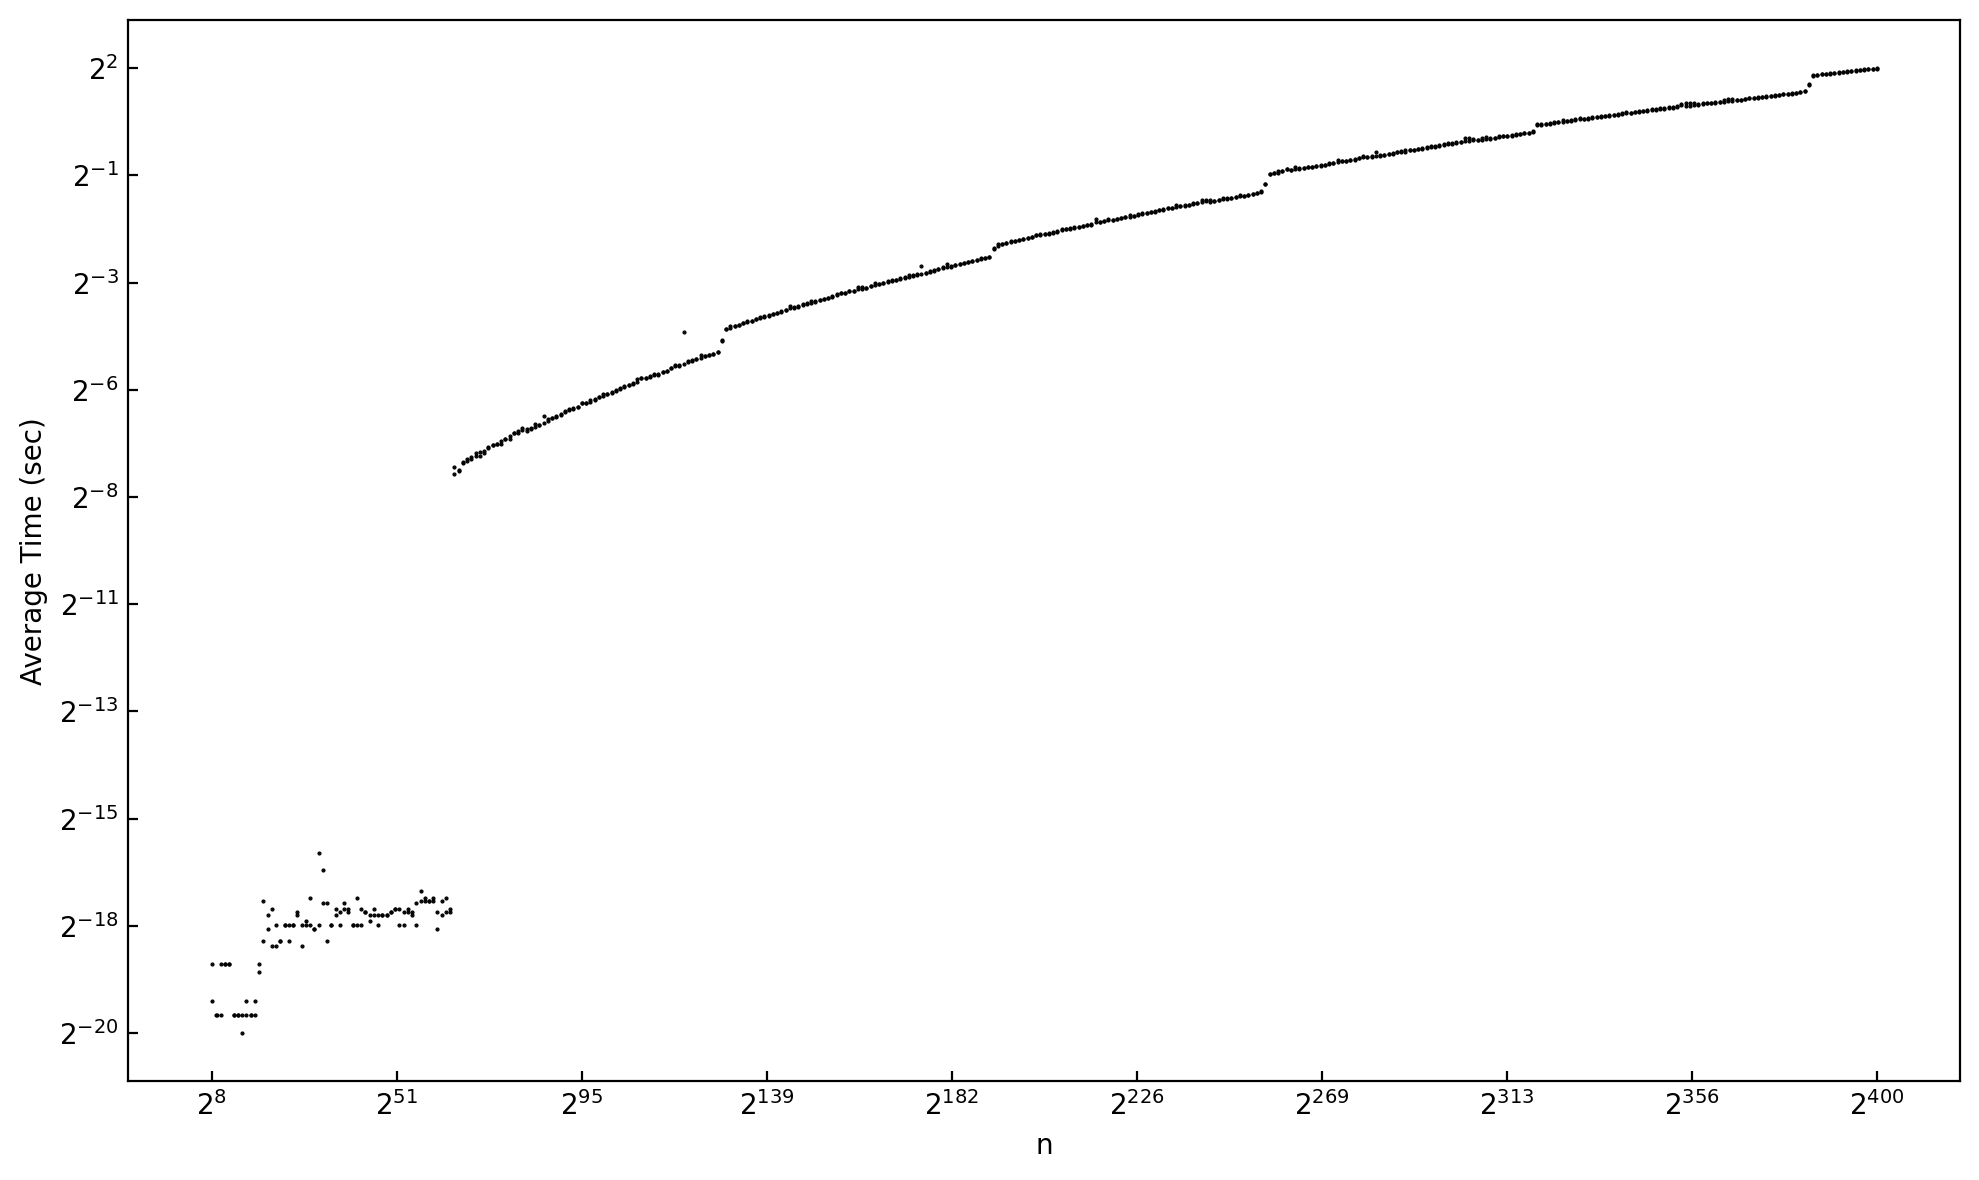

In [7]:
graph_complexity([(t+sys.float_info.epsilon) for t in times_400[0]], times_400[1], dpts=786, log=True)

In [14]:
indexed_64_bit_primes = {}
for b in range(8,65):
    indexed_64_bit_primes[b] = [(2**b - k) for k in data[b]]
    print(len(indexed_64_bit_primes[b]), end=', ')
indexed_400_bit_primes = {}
for b in range(8,401):
    indexed_400_bit_primes[b] = [(2**b - k) for k in data[b]]
    print(len(indexed_400_bit_primes[b]), end=', ')

10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 

In [9]:
tripleprimes = []
for b in range(8,29):
    count = 0
    for i1, p1 in enumerate(indexed_64_bit_primes[b]):
        if count >= 100:
            break
        for i2, p2 in enumerate(indexed_64_bit_primes[b][i1:]):
            if count >= 100:
                break
            for i3, p3 in enumerate(indexed_64_bit_primes[b][i2:]):
                if count >= 100:
                    break
                tripleprimes.append(p1*p2*p3)
                count += 1

print(len(tripleprimes), max(tripleprimes))
print(max(tripleprimes).bit_length())
print(tripleprimes[890:])

2100 19342800791988102749826199
84
[280638175375871, 280595295155941, 280535262848039, 280518110760067, 280492382628109, 280595295155941, 280552421487911, 280492398352669, 280475248885457, 280449524684639, 2251748274470911, 2251610837614583, 2251542119186419, 2251232886259681, 2250923653332943, 2250717498048451, 2250683138834369, 2250305187479467, 2250202109837221, 2250064672980893, 2251473409146799, 2251404694912907, 2251095480860393, 2250786266807879, 2250580124106203, 2250545766989257, 2250167838702851, 2250064767352013, 2249927338884229, 2251335982776151, 2251026778160749, 2250717573545347, 2250511437135079, 2250477081066701, 2250099164314543, 2249996096109409, 2249858671835897, 2250717616012351, 2250408453863953, 2250202345765021, 2250167994415199, 2249790129567157, 2249687075517691, 2249549670118403, 2250099334182559, 2249893254394963, 2249858907763697, 2249481094819771, 2249378054925973, 2249240668400909, 2249687193481591, 2249652849996029, 2249275071654847, 2249172041198161, 22

In [ ]:
# with open("temp_data.txt") as f:
#     loaded = [(line.strip()) for line in f]

# loaded = [int(c) for c in loaded]

In [10]:
times_sqf = primality_complexity(lambda n : factorize(n), 0, sorted(tripleprimes))

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

Finished concat.
Graphing...
9840287.666666666 1.9342799110644955e+25 4.212061564349649e-06 1.393043359120687


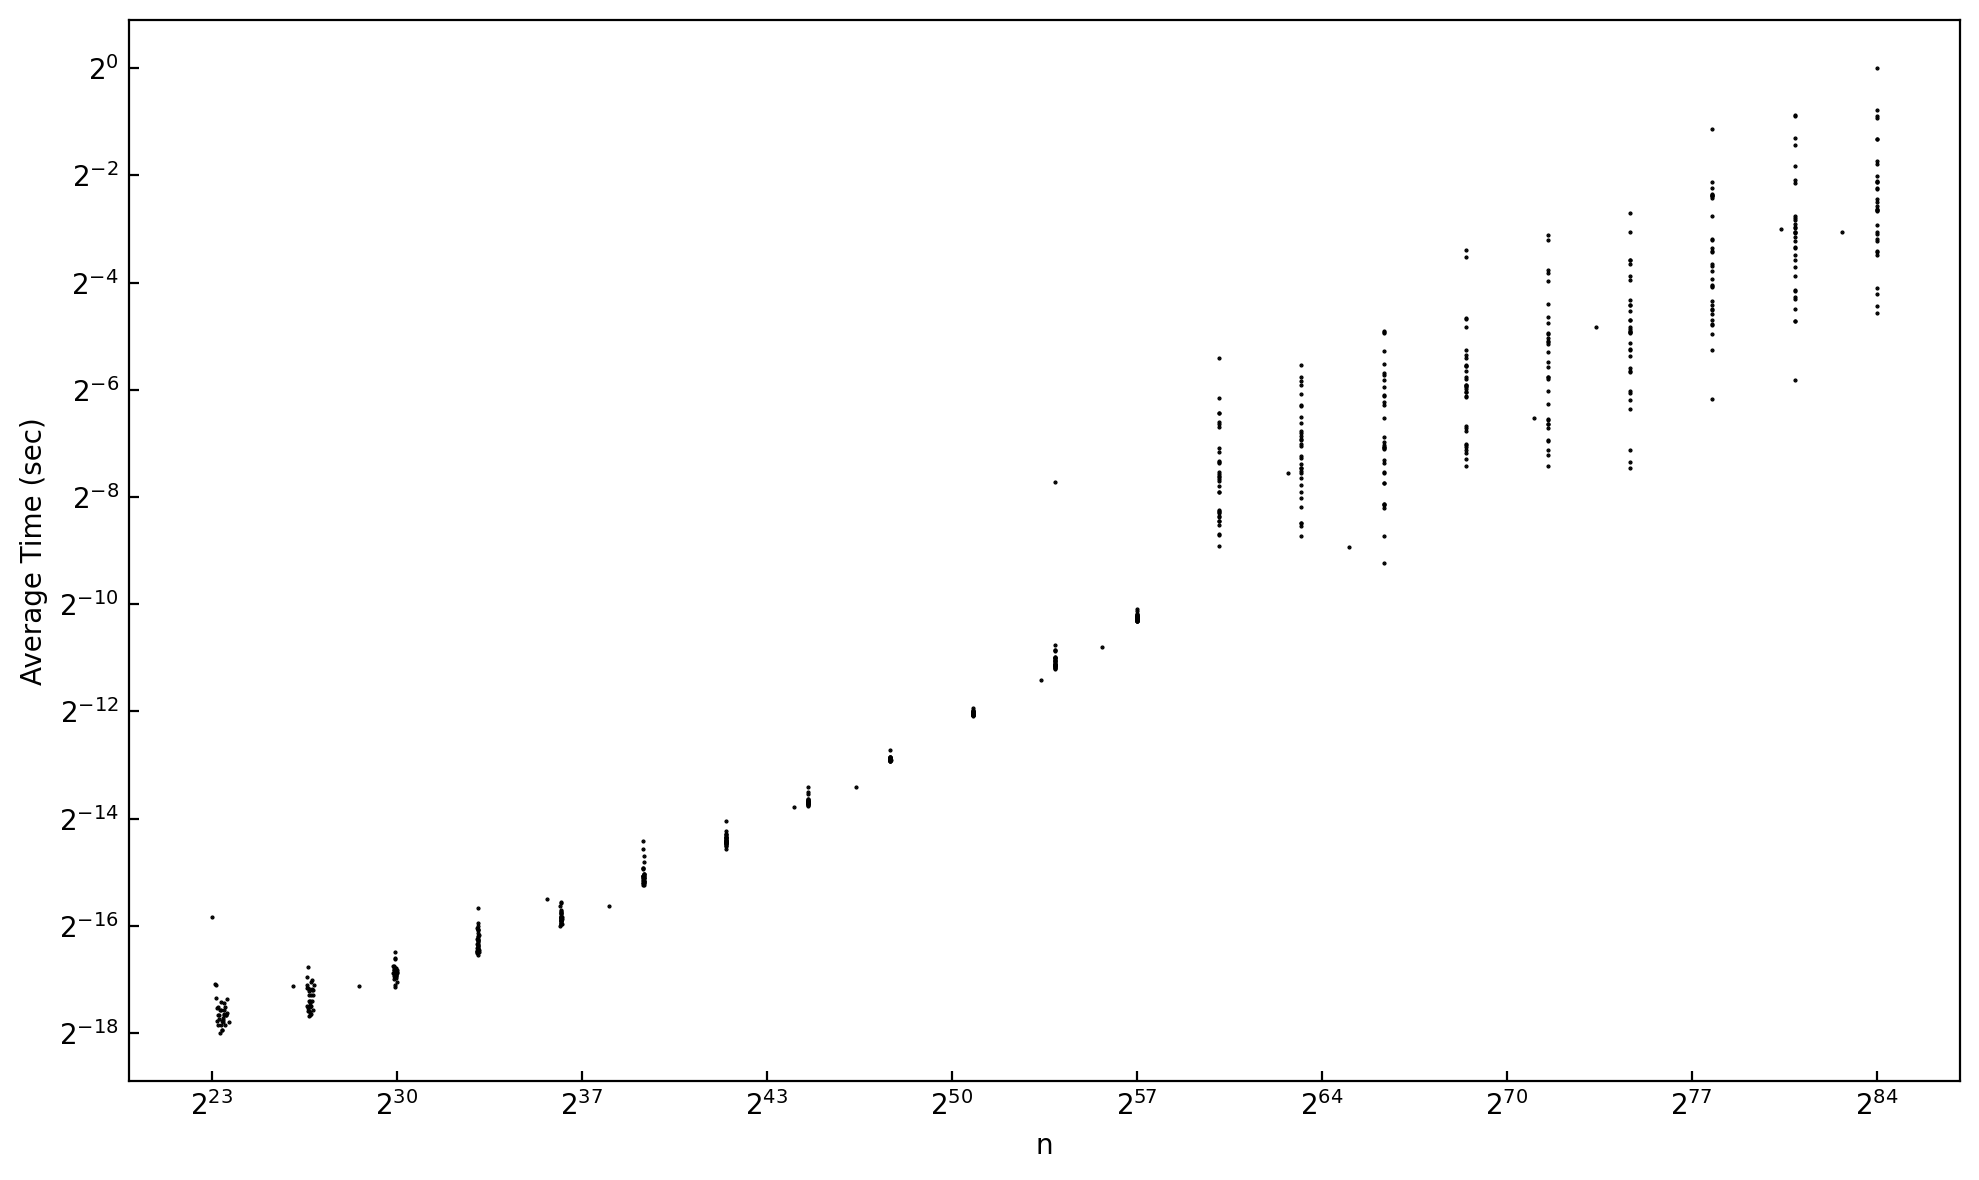

In [11]:
graph_complexity([(t+sys.float_info.epsilon) for t in times_sqf[0]], times_sqf[1], dpts=700, log=True)

In [12]:
sieve_data = [int(10 ** (0.2*n)) for n in range(5, 51)]

len(sieve_data), sieve_data

(46,
 [10,
  15,
  25,
  39,
  63,
  100,
  158,
  251,
  398,
  630,
  1000,
  1584,
  2511,
  3981,
  6309,
  10000,
  15848,
  25118,
  39810,
  63095,
  100000,
  158489,
  251188,
  398107,
  630957,
  1000000,
  1584893,
  2511886,
  3981071,
  6309573,
  10000000,
  15848931,
  25118864,
  39810717,
  63095734,
  100000000,
  158489319,
  251188643,
  398107170,
  630957344,
  1000000000,
  1584893192,
  2511886431,
  3981071705,
  6309573444,
  10000000000])

In [13]:
times_sieve = primality_complexity(lambda n : sieve_to(n), 0, sorted(sieve_data))

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 
Finished collecting times.


Finished concat.
Graphing...
10 10000000000 1.096725463889392e-05 153.12656617164612


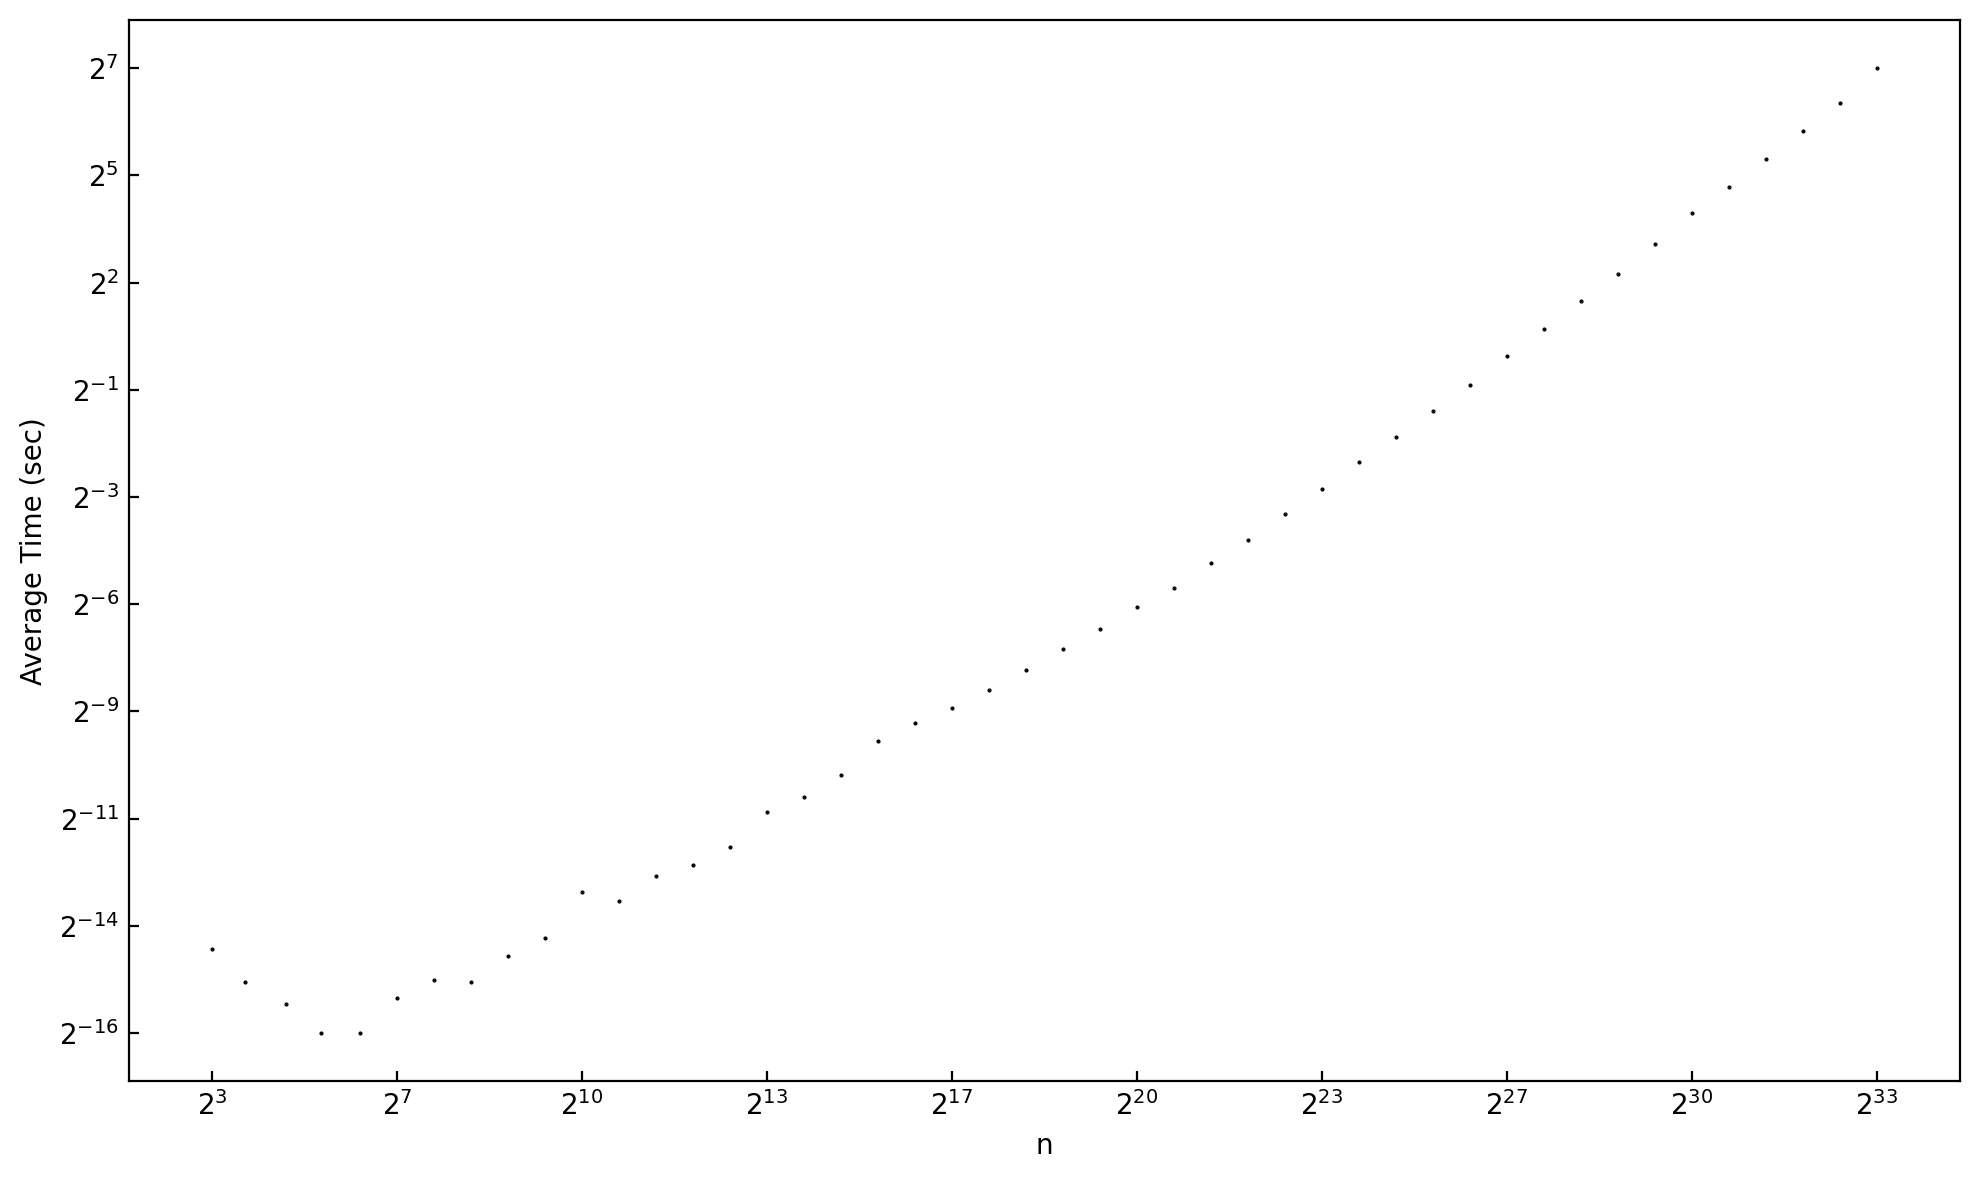

In [14]:
graph_complexity([(t+sys.float_info.epsilon) for t in times_sieve[0]], times_sieve[1], dpts=46, log=True)

In [23]:
data_e = [e for e in range(8, 26)]

data_smooth = []
for e in data_e:
    primes_e = indexed_64_bit_primes[e] + indexed_64_bit_primes[e+1]
    y = 2**e - 1
    for _ in range(60):
        p1 = random.choice(primes_e)
        p2 = random.choice(primes_e)
        data_smooth.append((p1 * p2, y))

len(data_smooth), min(data_smooth), max(data_smooth), data_smooth

(1080,
 (43931, 255),
 (4503596271927521, 33554431),
 [(54707, 255),
  (231883, 255),
  (47083, 255),
  (115439, 255),
  (239117, 255),
  (226351, 255),
  (103739, 255),
  (234649, 255),
  (115543, 255),
  (53743, 255),
  (49447, 255),
  (51983, 255),
  (106481, 255),
  (56977, 255),
  (105289, 255),
  (90817, 255),
  (48319, 255),
  (56977, 255),
  (127759, 255),
  (229297, 255),
  (112547, 255),
  (53357, 255),
  (115439, 255),
  (117367, 255),
  (115543, 255),
  (103601, 255),
  (120259, 255),
  (97271, 255),
  (109691, 255),
  (111583, 255),
  (53743, 255),
  (92137, 255),
  (111607, 255),
  (45113, 255),
  (47897, 255),
  (256027, 255),
  (49729, 255),
  (112547, 255),
  (111613, 255),
  (97271, 255),
  (43931, 255),
  (210677, 255),
  (117217, 255),
  (237703, 255),
  (239021, 255),
  (45901, 255),
  (58483, 255),
  (246973, 255),
  (55973, 255),
  (237703, 255),
  (224507, 255),
  (227429, 255),
  (117199, 255),
  (103249, 255),
  (102803, 255),
  (121651, 255),
  (58081, 255),


In [24]:
times_smooth = primality_complexity(lambda n : is_smooth(*n), 0, sorted(data_smooth))

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

In [25]:
inputs = [pair[1] for pair in times_smooth[1]]
inputs

[255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 255,
 255,
 511,
 255,
 511,
 511,
 255,
 511,
 511,
 255,
 511,
 255,
 511,
 255,
 255,
 255,
 255,
 255,
 255,
 511,
 511,
 511,
 255,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 511,
 1023,
 511,
 511,
 1023,
 1023,
 511,
 1023,
 511,
 511,
 1023,
 1023,
 1023,
 1023,
 1023,
 511,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 511,
 511,
 1023,
 511,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,
 1023,


Finished concat.
Graphing...
255 33554431 1.2516975405052477e-06 0.004331052303314431


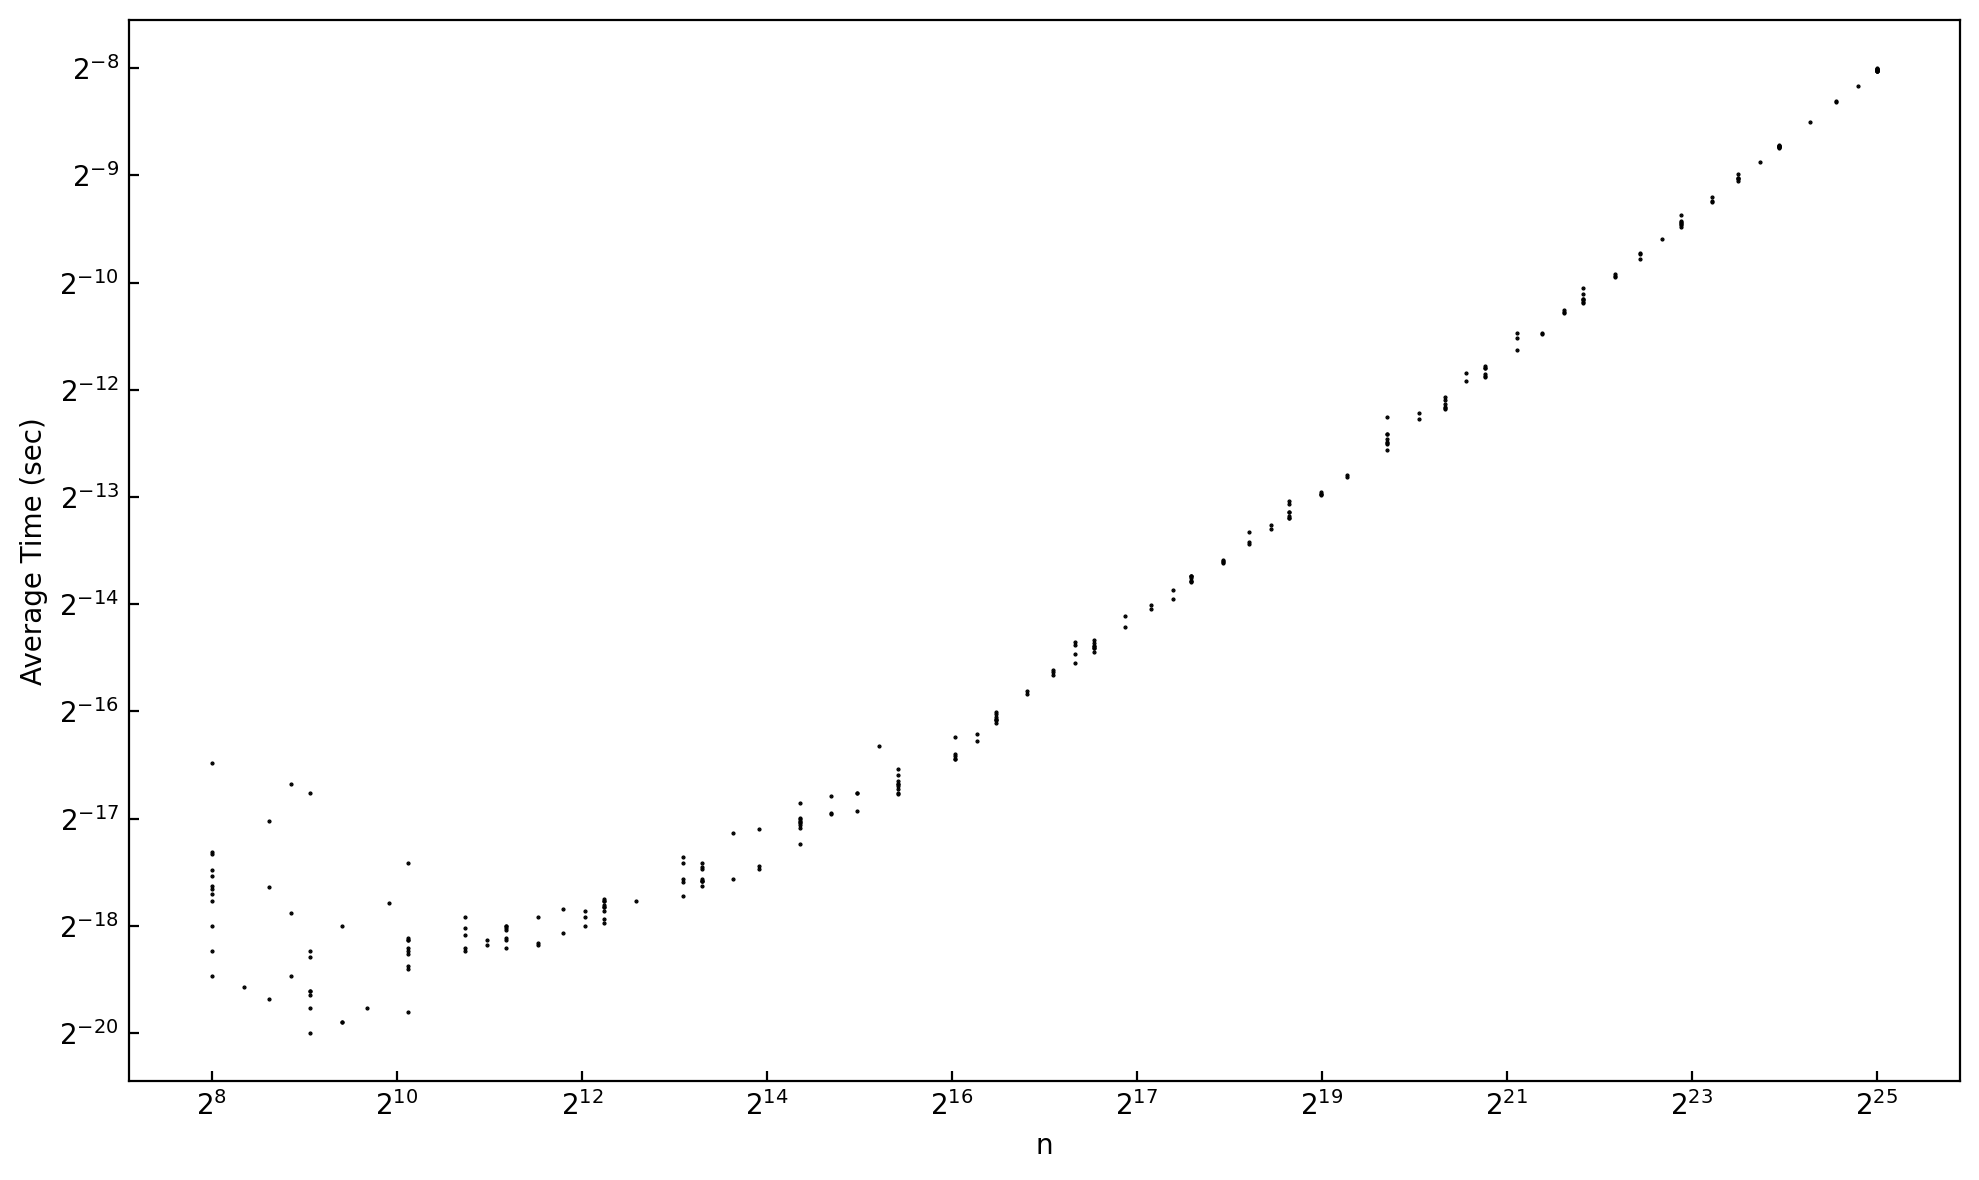

In [26]:
graph_complexity([(t+sys.float_info.epsilon) for t in times_smooth[0]], inputs, dpts=270, log=True)

In [27]:
U = [float(i/100.0) for i in range(5000)]
times = primality_complexity(lambda n : log_dickman(n), 0, sorted(U))

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

Finished concat.
Graphing...
0.045 49.945 1.9073486328125e-07 5.698204040527343e-06


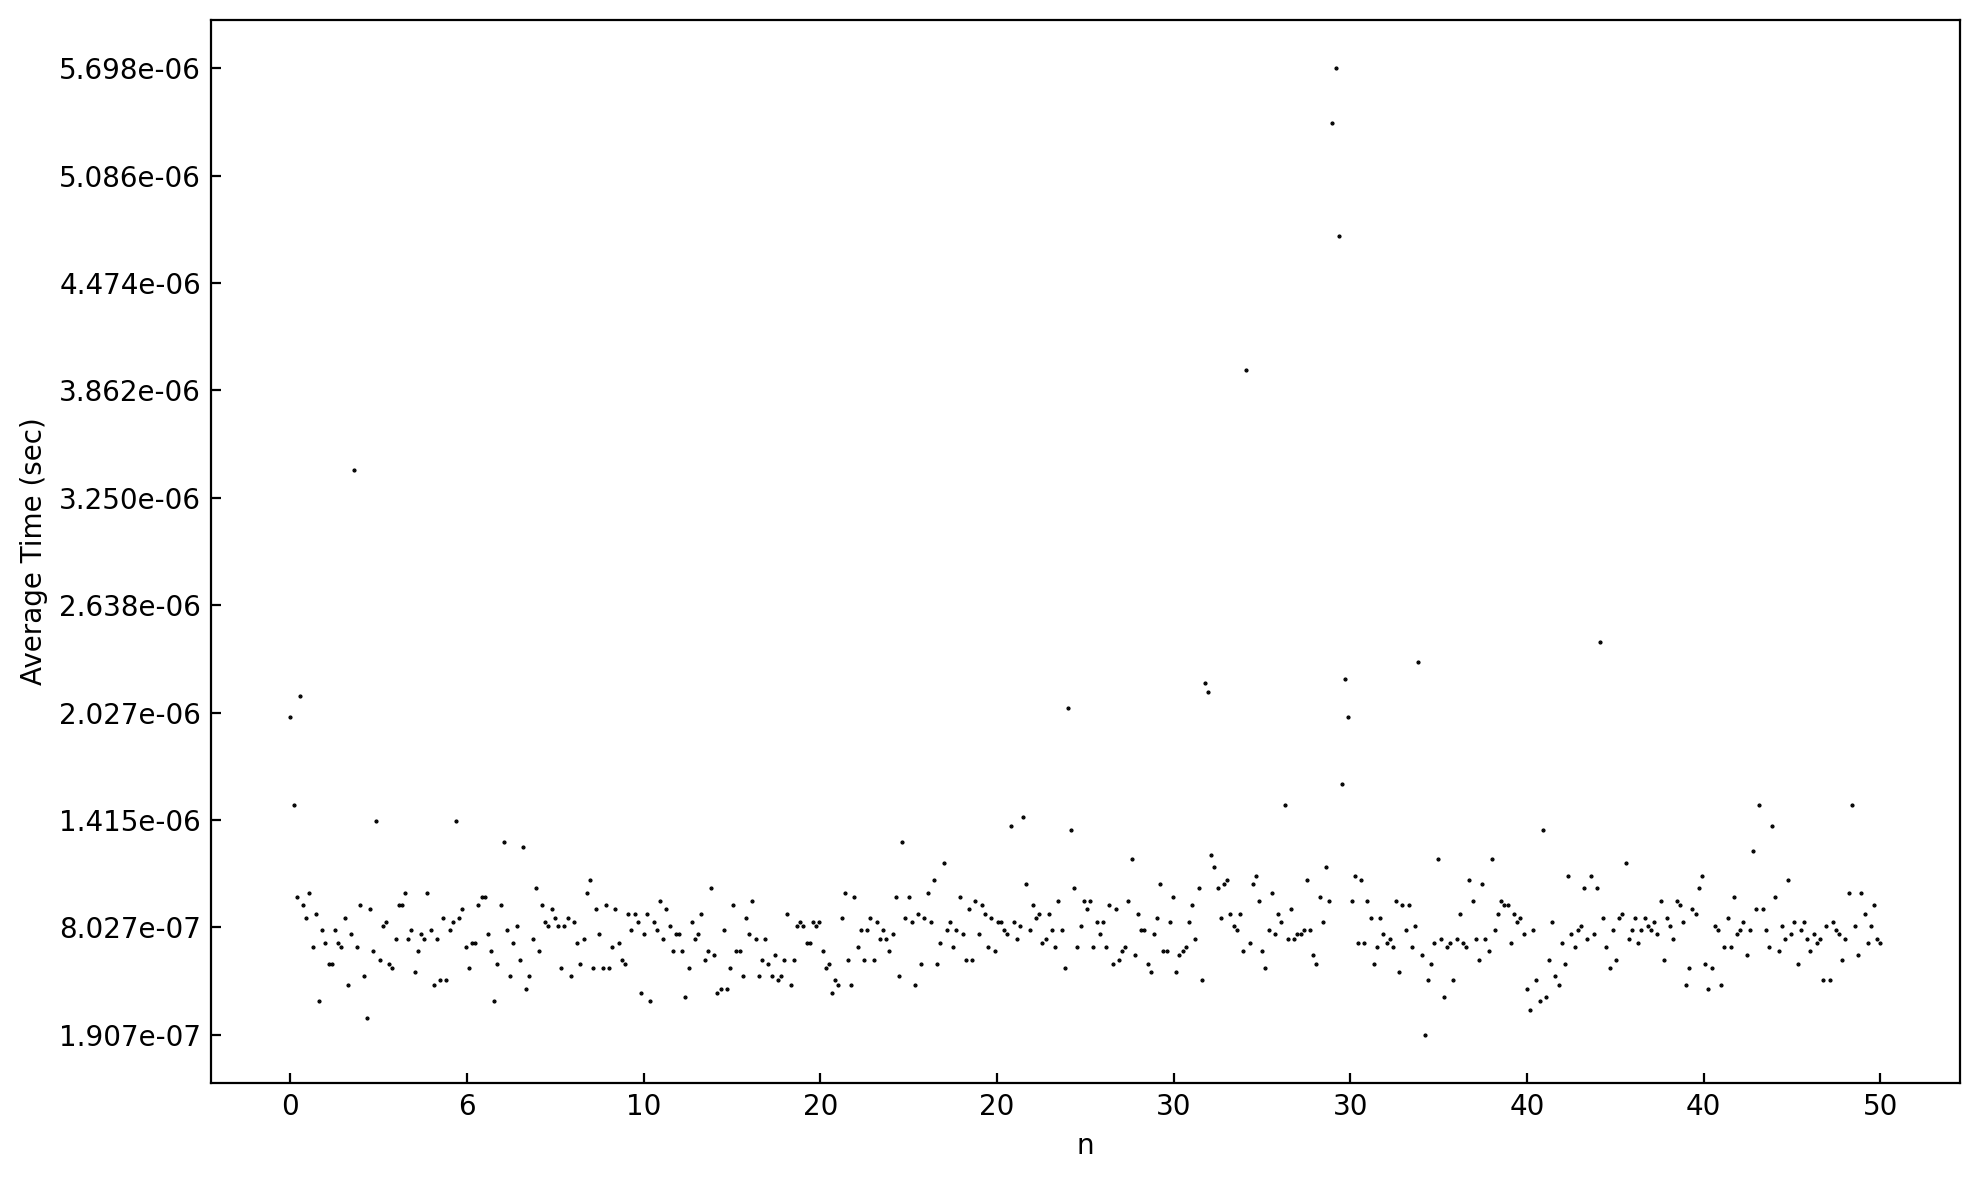

In [28]:
graph_complexity(times[0], times[1], dpts=500, log=False)

In [29]:
import math

num_cases = 4000
bit_levels = 16
min_bits, max_bits = 16, 256
u_max = 40.0
y_max = 2**48 - 1

log_min, log_max = math.log(min_bits), math.log(max_bits)
bit_lengths = sorted({
    int(round(math.exp(log_min + i * (log_max - log_min) / (bit_levels - 1))))
    for i in range(bit_levels)
})

cases = []
cases_per_level = num_cases // len(bit_lengths)

for b in bit_lengths:
    for _ in range(cases_per_level):
        x = random.getrandbits(b) | (1 << (b - 1))
        u = random.uniform(1.0, u_max)
        y = max(2, int(math.exp(math.log(x) / u)))
        if y > y_max:
            y = y_max
        cases.append((str(x), y))

In [30]:
len(cases), max(cases)

(4000, ('99959814406330816140123550954306827974583894', 172127001443040))

In [31]:
def difficulty(pair):
    x_str, y = pair
    x = int(x_str)
    b = x.bit_length()
    u = math.log(x) / math.log(y)
    return b * u

times = primality_complexity(lambda n : psi_approx(n[0], n[1]), 0, sorted(cases, key=difficulty))

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

Finished concat.
Graphing...
21.93548786288717 10076.72323200173 1.239776611328125e-06 1.4400482177734375e-05


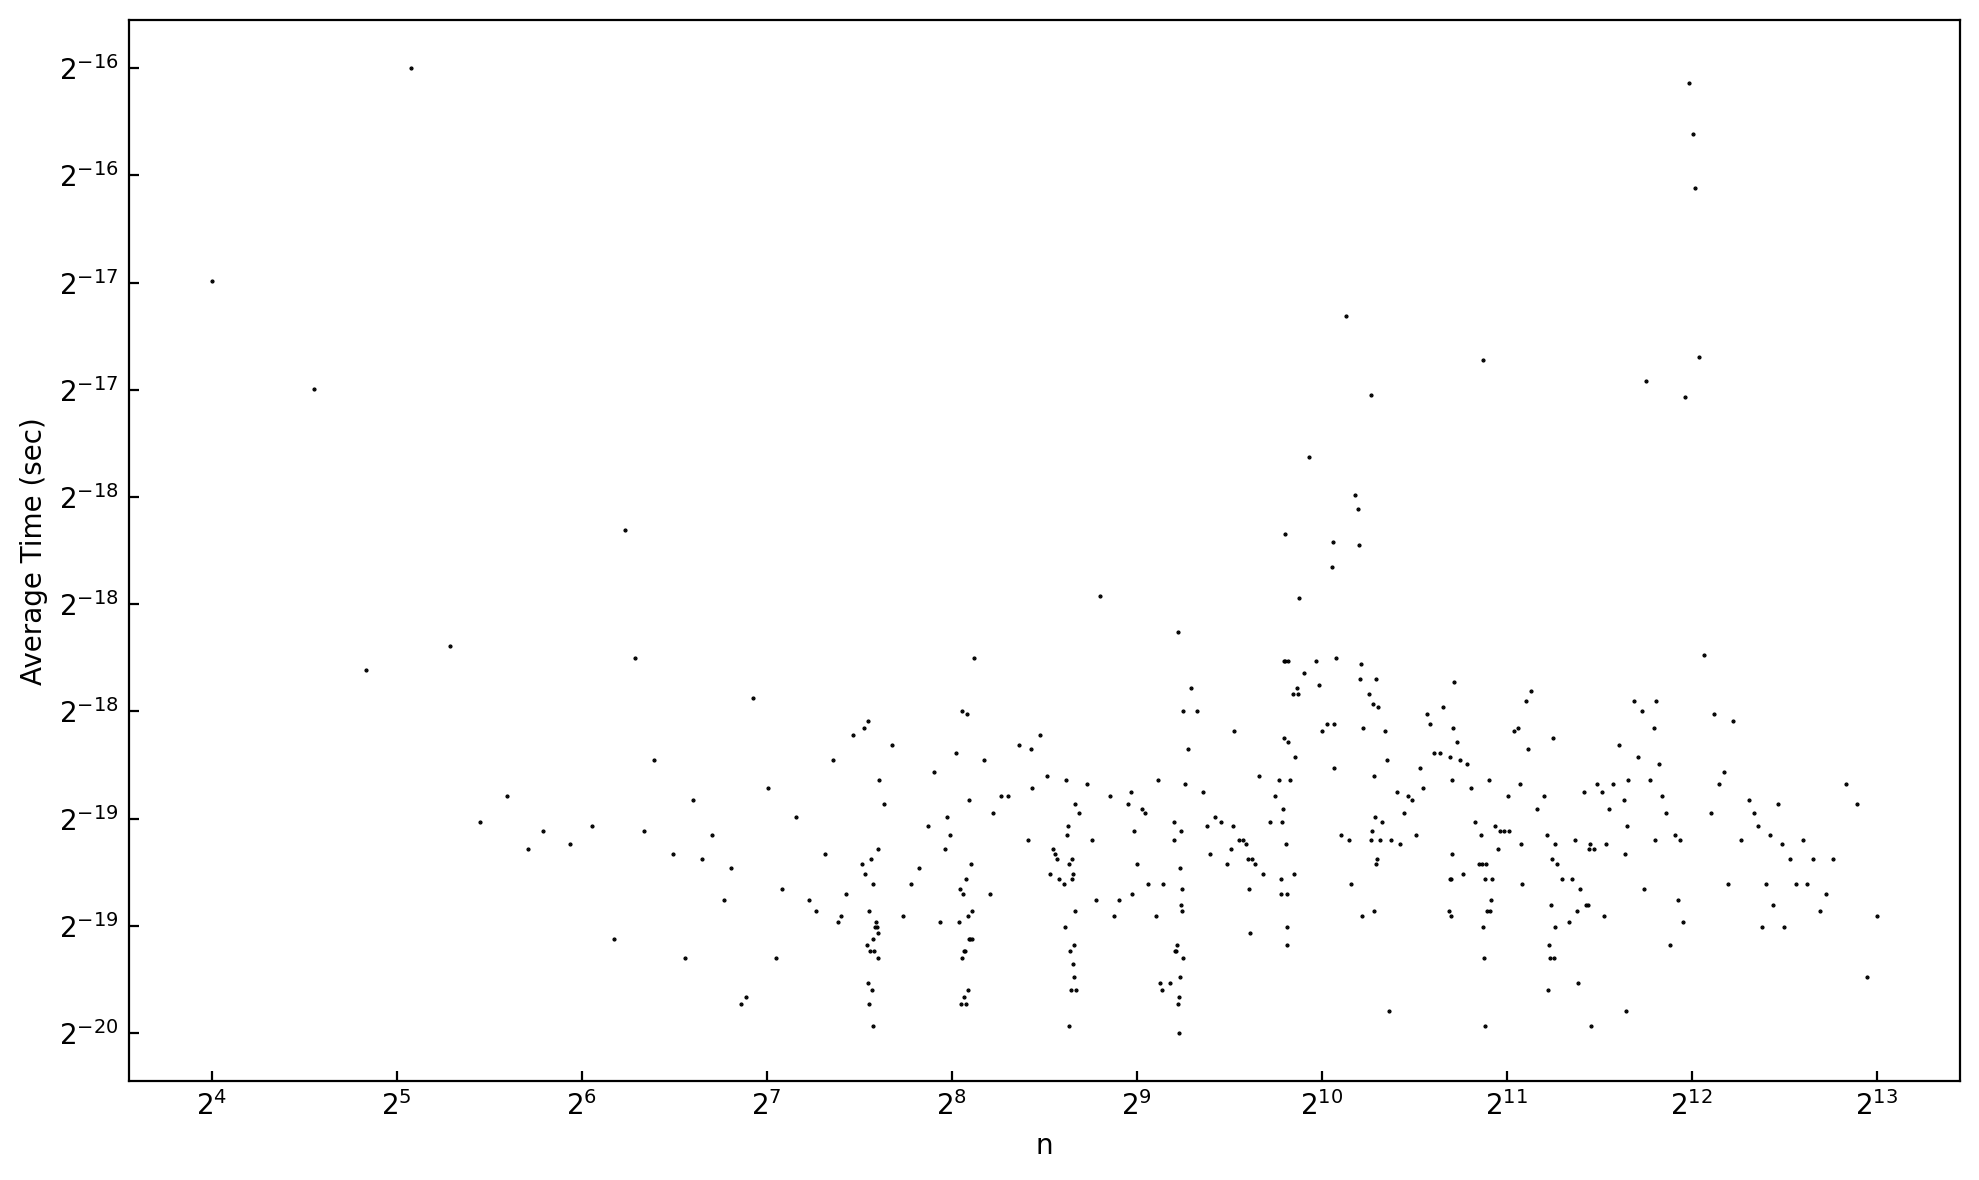

In [32]:
inputs = [difficulty(pair) for pair in times[1]]
graph_complexity(times[0], inputs, dpts=400, log=True)

In [25]:
data_i= [i for i in range(8, 257)]
choices = 5
k = 100

data_legendre = []
for i in data_i:
    sub = indexed_400_bit_primes[i]
    for _ in range(choices):
        p = random.choice(sub)
        data_legendre.append((p - k, p))

print(len(data_legendre), data_legendre)


1245 [(151, 251), (151, 251), (151, 251), (129, 229), (151, 251), (403, 503), (357, 457), (363, 463), (367, 467), (403, 503), (909, 1009), (919, 1019), (877, 977), (913, 1013), (867, 967), (1911, 2011), (1917, 2017), (1911, 2011), (1887, 1987), (1911, 2011), (3957, 4057), (3921, 4021), (3949, 4049), (3991, 4091), (3957, 4057), (8067, 8167), (8011, 8111), (8017, 8117), (8079, 8179), (8023, 8123), (16261, 16361), (16219, 16319), (16233, 16333), (16233, 16333), (16261, 16361), (32587, 32687), (32649, 32749), (32533, 32633), (32617, 32717), (32617, 32717), (65349, 65449), (65319, 65419), (65419, 65519), (65323, 65423), (65347, 65447), (130959, 131059), (130941, 131041), (130881, 130981), (130887, 130987), (130873, 130973), (261969, 262069), (262011, 262111), (262039, 262139), (261951, 262051), (262003, 262103), (524131, 524231), (524161, 524261), (524121, 524221), (524103, 524203), (524169, 524269), (1048333, 1048433), (1048471, 1048571), (1048449, 1048549), (1048473, 1048573), (1048471, 1

In [51]:
import math

def ordering(tup):
    a, p = tup
    return p

In [52]:
times = primality_complexity(lambda n : legendre_symbol(n[0], n[1]), 0, sorted(data_legendre, key=ordering))

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

In [53]:
inputs = [(ordering(tup)) for tup in times[1]]
inputs

[229,
 251,
 251,
 251,
 251,
 457,
 463,
 467,
 503,
 503,
 967,
 977,
 1009,
 1013,
 1019,
 1987,
 2011,
 2011,
 2011,
 2017,
 4021,
 4049,
 4057,
 4057,
 4091,
 8111,
 8117,
 8123,
 8167,
 8179,
 16319,
 16333,
 16333,
 16361,
 16361,
 32633,
 32687,
 32717,
 32717,
 32749,
 65419,
 65423,
 65447,
 65449,
 65519,
 130973,
 130981,
 130987,
 131041,
 131059,
 262051,
 262069,
 262103,
 262111,
 262139,
 524203,
 524221,
 524231,
 524261,
 524269,
 1048433,
 1048549,
 1048571,
 1048571,
 1048573,
 2097023,
 2097041,
 2097083,
 2097131,
 2097143,
 4194191,
 4194247,
 4194271,
 4194277,
 4194301,
 8388461,
 8388473,
 8388473,
 8388571,
 8388593,
 16777121,
 16777139,
 16777139,
 16777139,
 16777213,
 33554267,
 33554291,
 33554317,
 33554341,
 33554393,
 67108739,
 67108753,
 67108777,
 67108819,
 67108859,
 134217493,
 134217497,
 134217529,
 134217529,
 134217541,
 268435183,
 268435243,
 268435291,
 268435361,
 268435361,
 536870791,
 536870813,
 536870813,
 536870869,
 536870909,
 1

Finished concat.
Graphing...
246.6 1.157920892373162e+77 1.1920928955078125e-06 1.0442733764648437e-05


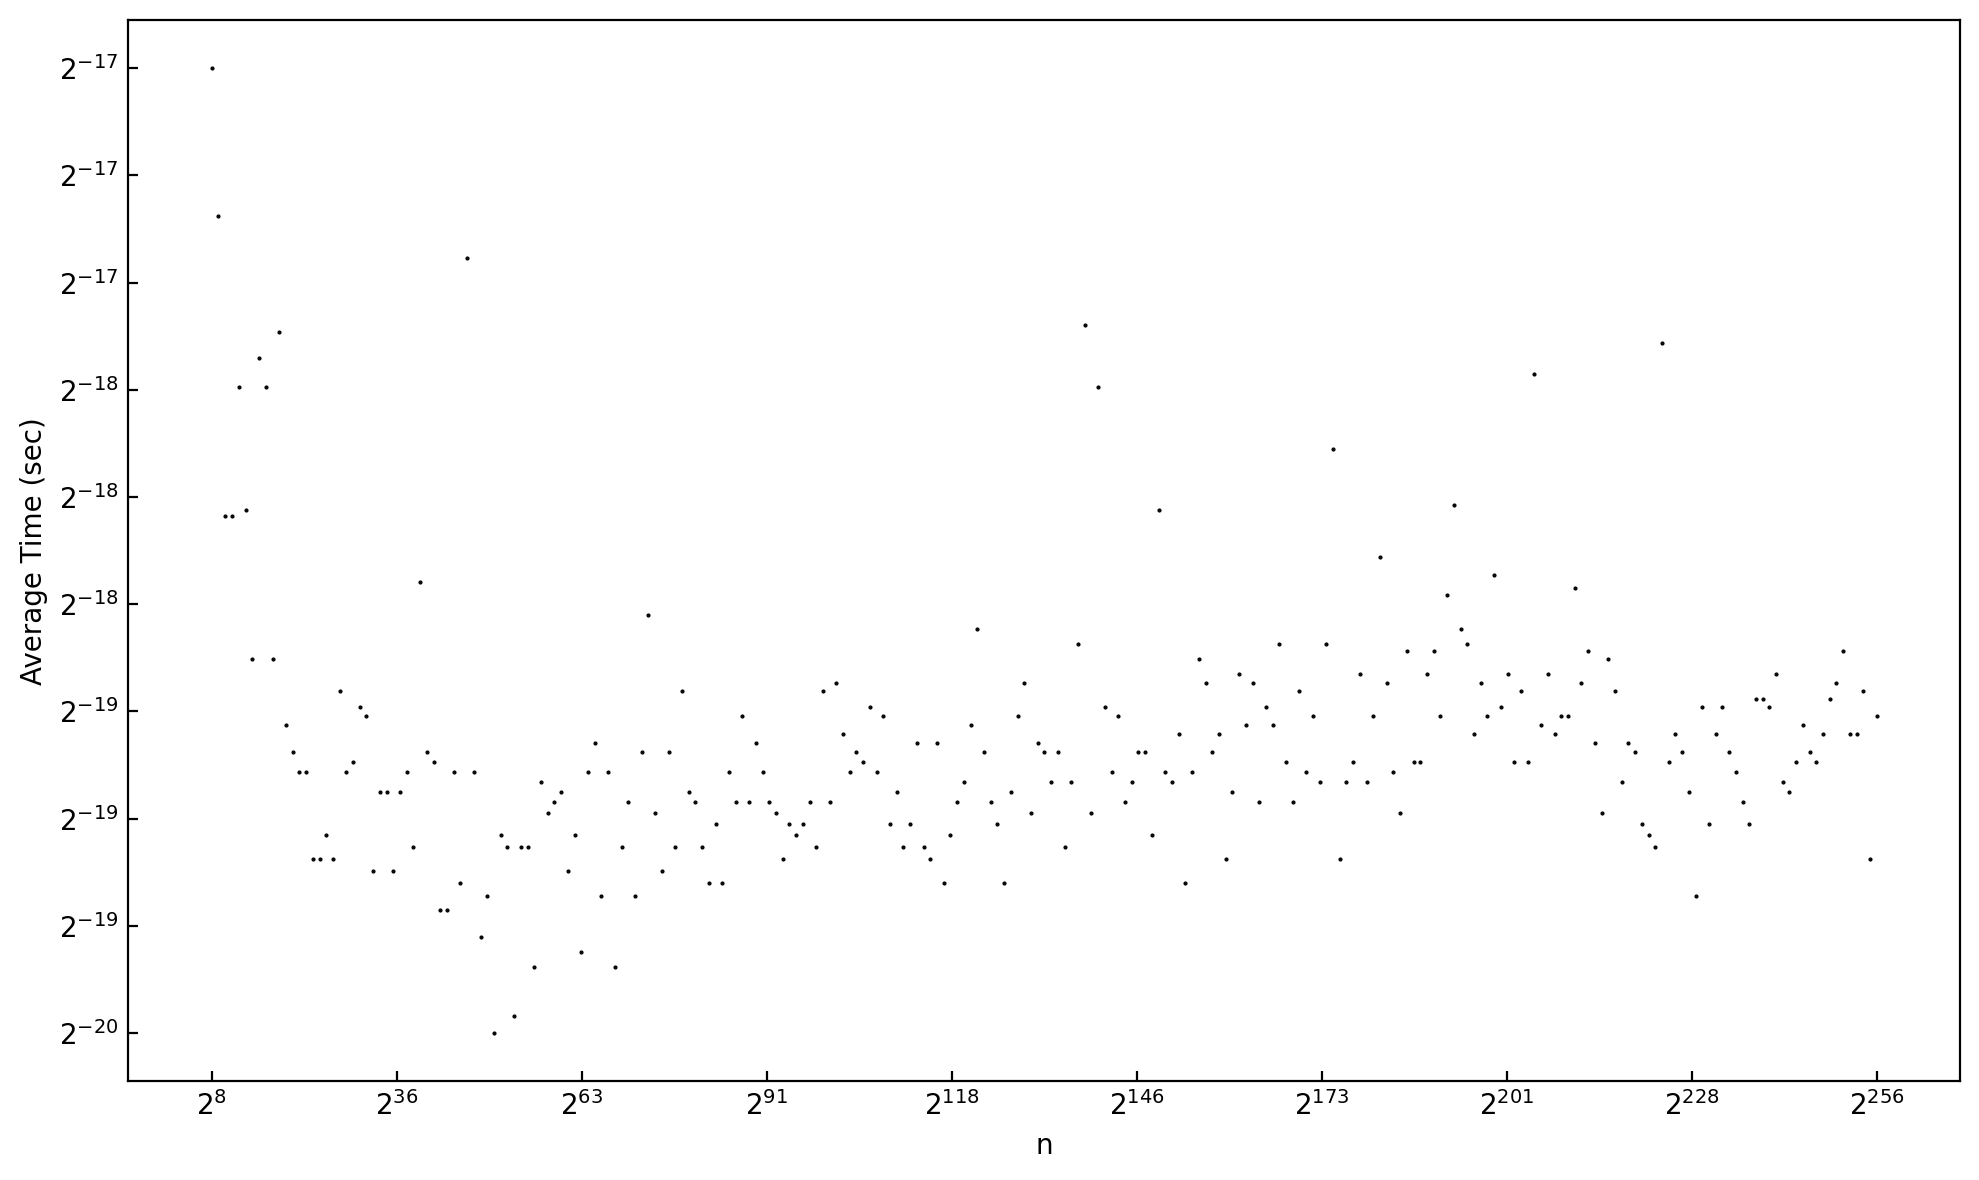

In [56]:
graph_complexity(times[0], inputs, dpts=249, log=True)